In [48]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
data = np.genfromtxt('advertising.csv',delimiter=',',skip_header=1)
N = data.shape[0]

X = data[:,:3]
y = data[:,3:]


In [50]:
def mean_normalization(x):
    N = len(x)
    maxi = np.max(x)
    mini = np.min(x)
    avg = np.mean(x)
    
    x = (x-avg)/(maxi-mini)
    x_b = np.c_[np.ones((N,1)),x]
    
    return x_b,maxi,mini,avg

X_b,maxi,mini,avg = mean_normalization(X)
X_b[0]

array([ 1.        ,  0.55042679, -0.09835864,  0.00757928])

In [51]:
def stochastic_gradient_descent(x_b,y,epoch,lr): # 1 sample 
    theta = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
    theta_path = [theta]
    losses = []
    
    for i in range(epoch):
        for j in range(N):
            # lấy ngẫu nhiên 1 sample
            random_index = np.random.randint(N)
            
            xi = x_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            y_hat = np.dot(xi,theta)
            
            loss = (y_hat - yi)**2
            
            
            k = 2*(y_hat-yi)
            gradient = np.dot(xi.T,k)
            
            theta = theta - lr*gradient
            
            theta_path.append(theta.copy())
            losses.append(loss[0][0])
    return theta_path,losses
            

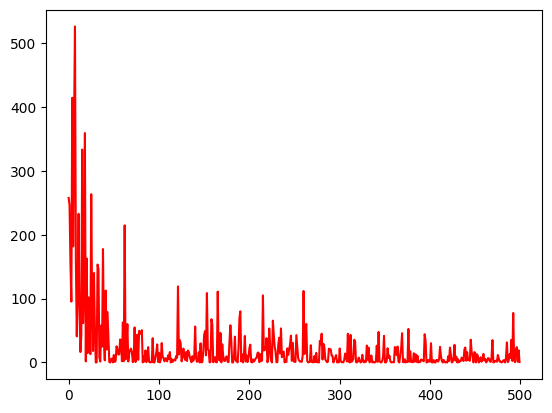

In [52]:
sgd_theta, losses = stochastic_gradient_descent(X_b, y, epoch=50, lr=0.01 )

# in loss cho 500 sample đầu
x_axis = list(range(500))
plt.plot(x_axis,losses[:500], color="r")
plt.show()

In [53]:
sgd_theta , losses = stochastic_gradient_descent (X_b,y,epoch =1,lr=0.01 )
print ( np .sum( losses ) )

8480.352453090945


In [54]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):
    theta = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
    theta_path = [theta]
    losses = []
    
    for i in range (n_epochs):
        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35,
                                       162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6,
                                       128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75,
                                       23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198,
                                       153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33,
                                       50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140,
                                       171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39,
                                       180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81,
                                       186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15,
                                       58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30,
                                       14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158,
                                       88, 62, 166, 156, 2, 134, 56, 123, 122, 154])
        
        x_b_shuffled_indices = X_b[shuffled_indices]
        y_shuffled_indices = y[shuffled_indices]
        
        for j in range(0,N,minibatch_size):
            xi = x_b_shuffled_indices[j:j+minibatch_size]
            yi = y_shuffled_indices[j:j+minibatch_size]
            
            y_hat = np.dot(xi,theta)
            
            loss = ((y_hat - yi)**2)/2
            
            k = 2*(y_hat-yi)
            gradient = np.dot(xi.T,k)
            
            theta = theta - learning_rate*gradient
            theta_path.append(theta)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
        
    return theta_path,losses
         

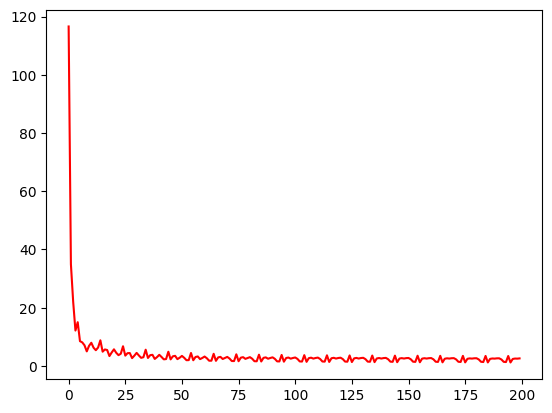

In [55]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

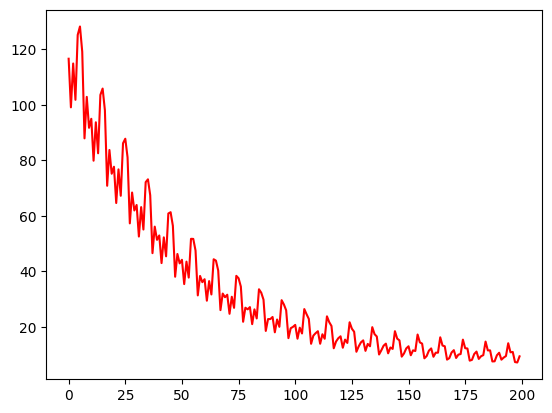

In [56]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray([21, 144, 17, 107, 37, 115, 167, 31, 3, 132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16, 185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126, 165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190, 169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131, 77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139, 195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147, 92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47, 174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67, 129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24, 168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55, 133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122, 154])


        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # tính output
            output = xi.dot(thetas)

            # tính loss
            loss = ((output - yi)**2)/2

            # tính đạo hàm cho loss
            loss_grd = (output - yi)/minibatch_size

            # tính đạo hàm cho các tham số
            gradients = xi.T.dot(loss_grd)

            # cập nhật tham số
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path, losses

mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50,  minibatch_size = 20, learning_rate=0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses[:200], color="r")
plt.show()

In [57]:
mbgd_thetas , losses = mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,minibatch_size = 20 , learning_rate =0.01)
print ( round ( sum( losses ) ,2) )

8865.65


In [58]:
def batch_gradient_descent(x_b,y,epoch = 100 ,lr = 0.01):
    theta = np.asarray([[1.16270837], [-0.81960489],  [1.39501033],  [0.29763545]])
    theta_path = [theta]
    losses = []
    
    for i in range(epoch):
        y_hat = np.dot(x_b,theta)
        
        loss = (y_hat - y)**2
        
        k = (2*(y_hat-y))/N
        gradient = np.dot(x_b.T,k)
        
        theta = theta - lr*gradient
        
        theta_path.append(theta)
        
        mean_loss = np.sum(loss)/N
        losses.append(mean_loss)
        
    return theta_path,losses

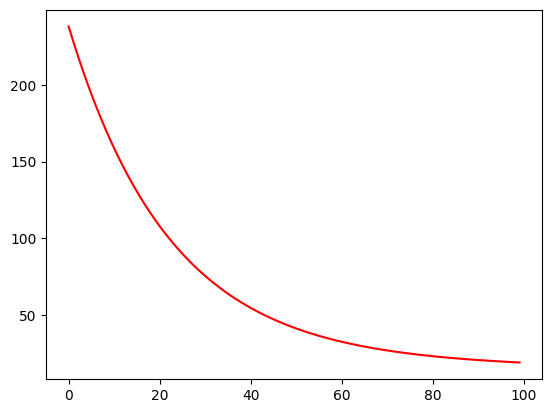

In [59]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, epoch=100, lr=0.01)

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis,losses[:100], color="r")
plt.show()

In [60]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, epoch=100, lr=0.01)
print(round(sum(losses),2))

6716.46


# Bitcoin Prediction

In [61]:
df = pd.read_csv('BTC-Daily.csv')
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [63]:
df = df.drop_duplicates() # Xóa bỏ các thành phần trùng lặp
df.head

<bound method NDFrame.head of             unix                 date   symbol      open      high       low  \
0     1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1     1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2     1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3     1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4     1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   
...          ...                  ...      ...       ...       ...       ...   
2646  1417478400  2014-12-02 00:00:00  BTC/USD    378.39    382.86    375.23   
2647  1417392000  2014-12-01 00:00:00  BTC/USD    376.40    382.31    373.03   
2648  1417305600  2014-11-30 00:00:00  BTC/USD    376.57    381.99    373.32   
2649  1417219200  2014-11-29 00:00:00  BTC/USD    376.42    386.60    372.25   
2650  1417132800  2014-11-28 00:00:00  BTC/USD    363.59    381.34    360.57   

         

In [64]:
df['date'] = pd.to_datetime(df['date'])
date_range = str(df['date'].dt.date.min()) + ' to ' + str(df['date'].dt.date.max())
print(date_range)

2014-11-28 to 2022-03-01


In [65]:
# Max abs scaler 
from sklearn.preprocessing import MaxAbsScaler

X = np.array([[1],[2],[3],[4]])
scaler = MaxAbsScaler()
x_transform = scaler.fit_transform(X)
x_transform

array([[0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

In [66]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([[1],[2],[3],[4]])

scaler = MinMaxScaler()
x_transform = scaler.fit_transform(X)
x_transform

array([[0.        ],
       [0.33333333],
       [0.66666667],
       [1.        ]])

In [67]:
from sklearn.preprocessing import StandardScaler # ưu tiên sử dụng
X = np.array([[1],[2],[3],[4]])

scaler = StandardScaler()
x_transform = scaler.fit_transform(X)
x_transform

array([[-1.34164079],
       [-0.4472136 ],
       [ 0.4472136 ],
       [ 1.34164079]])

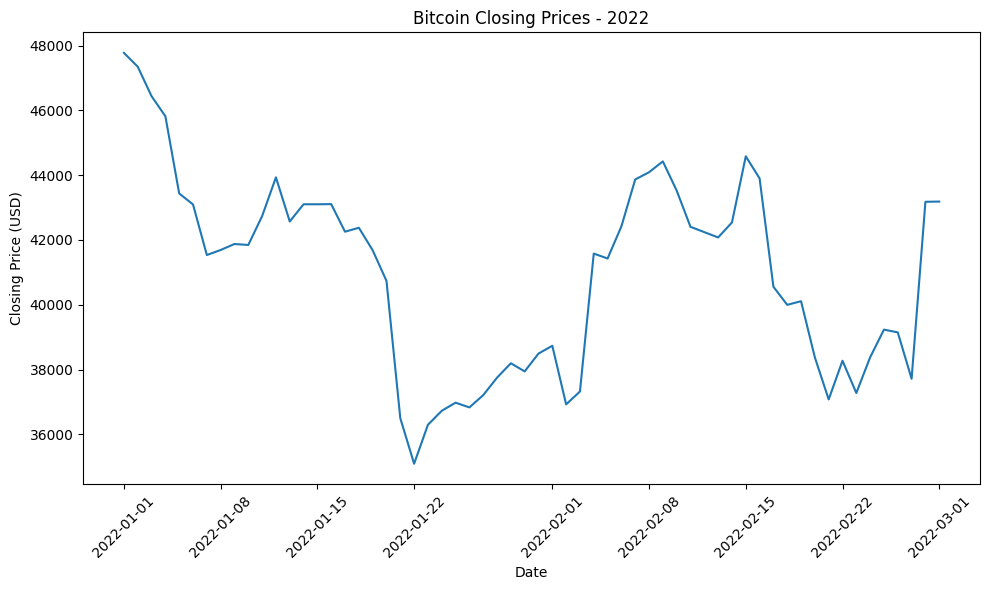

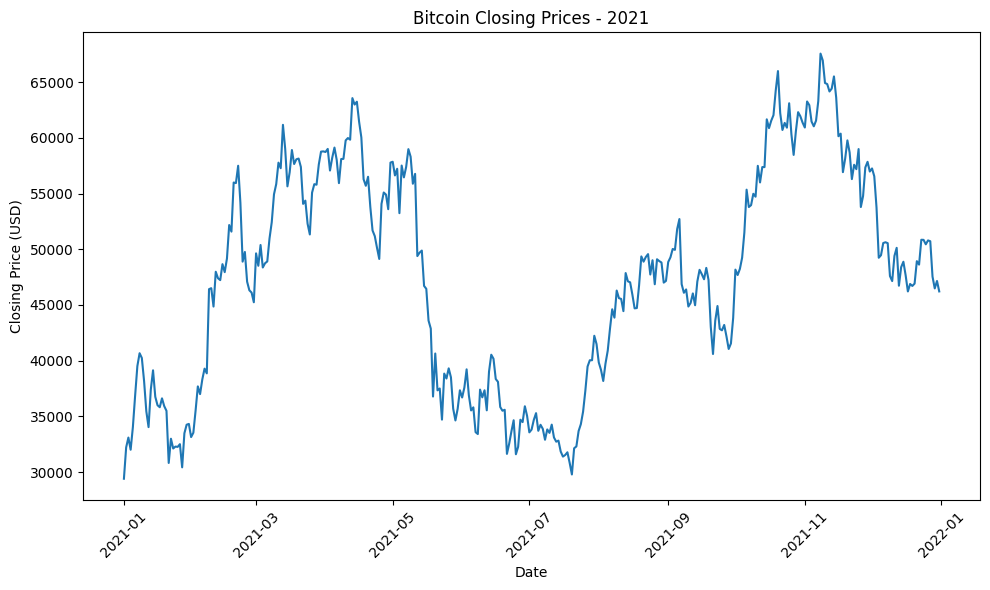

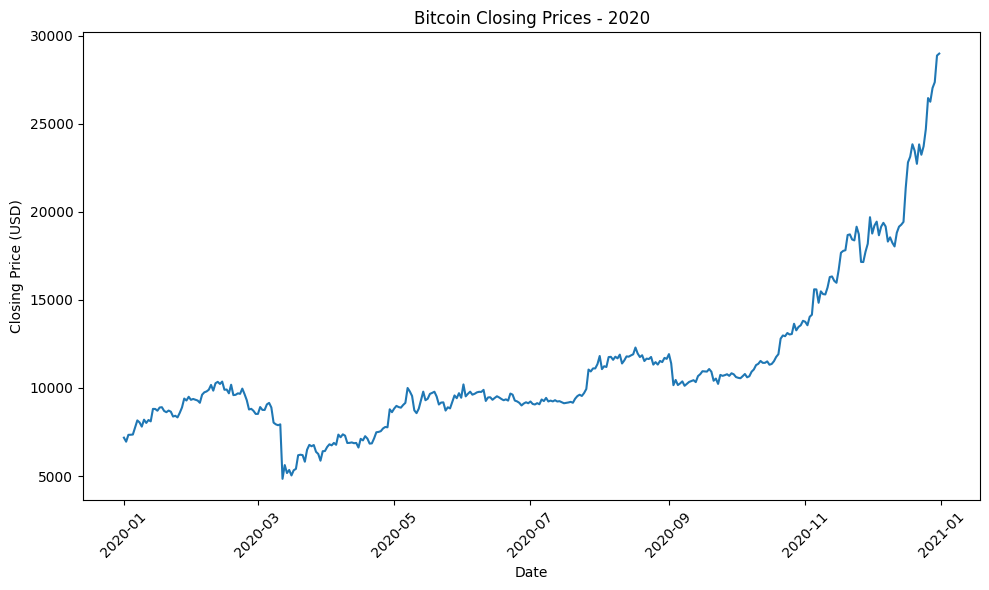

KeyboardInterrupt: 

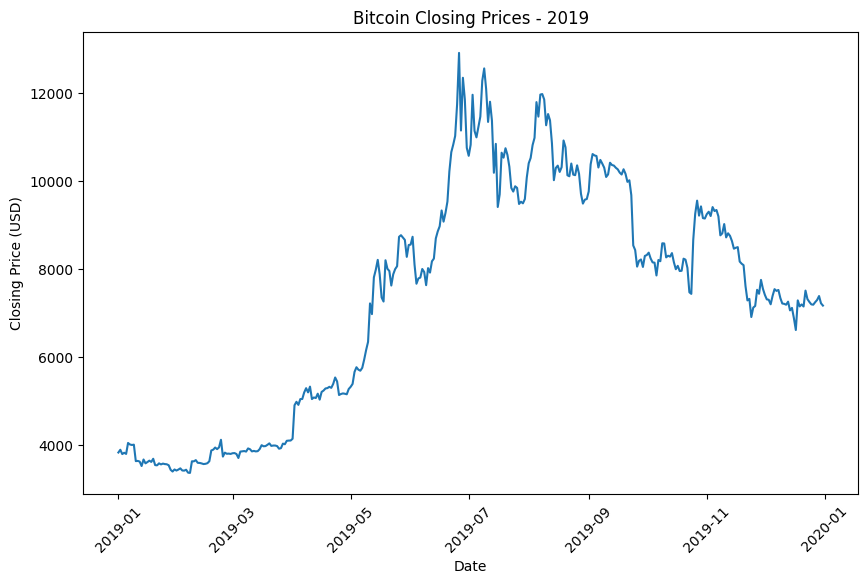

In [68]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


unique_years = df['year'].unique()
for year in unique_years:

    dates = pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31', freq='D')
    year_month_day = pd.DataFrame({'date': dates})
    year_month_day['year'] = year_month_day['date'].dt.year
    year_month_day['month'] = year_month_day['date'].dt.month
    year_month_day['day'] = year_month_day['date'].dt.day


    merged_data = pd.merge(year_month_day, df, on=['year', 'month', 'day'], how='left')

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(merged_data['date_x'], merged_data['close'])
    plt.title(f'Bitcoin Closing Prices - {year}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

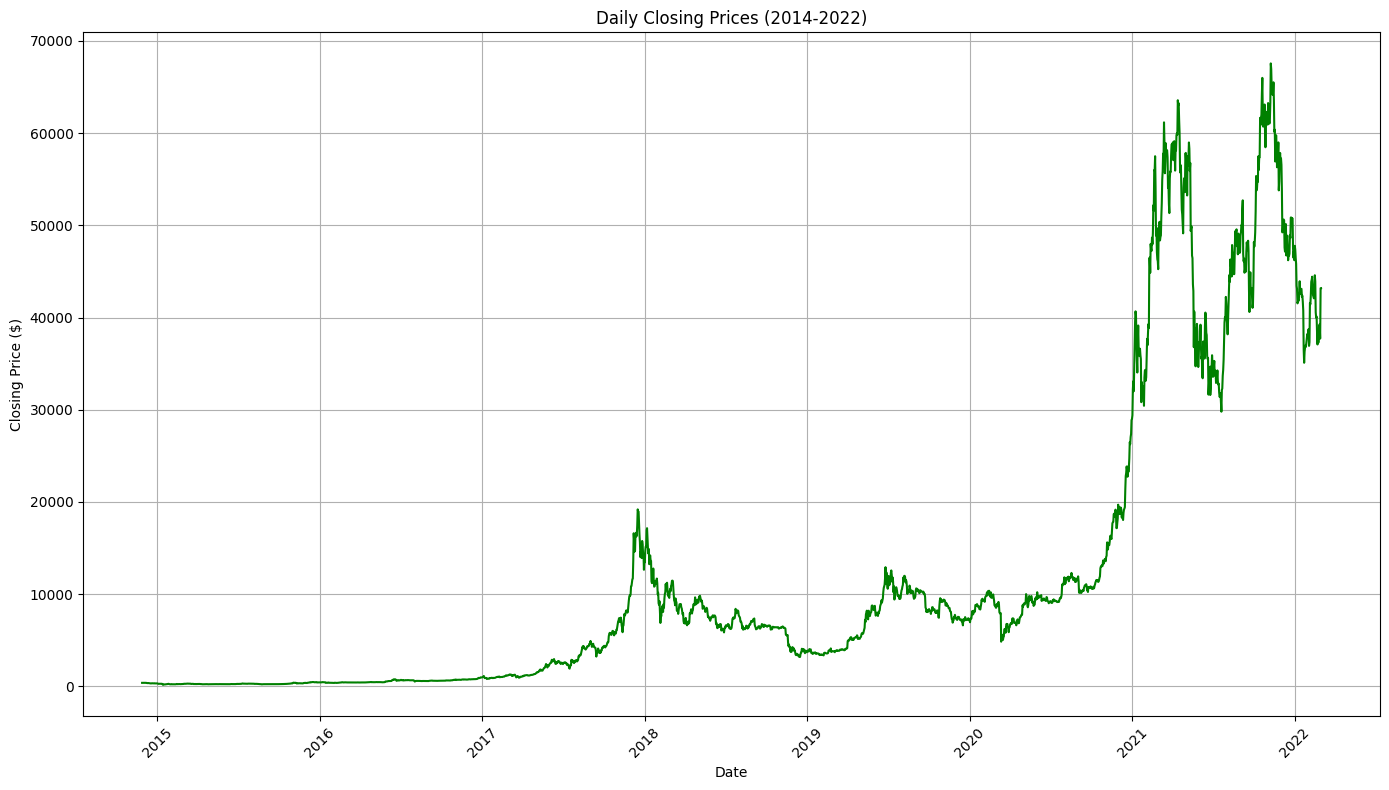

In [25]:
plt.figure(figsize=(14, 8))
plt.plot(df['date'], df['close'], linestyle='-', color='g')
plt.title('Daily Closing Prices (2014-2022)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_7560\3014666841.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = df_filtered['date'].map(mdates.date2num)


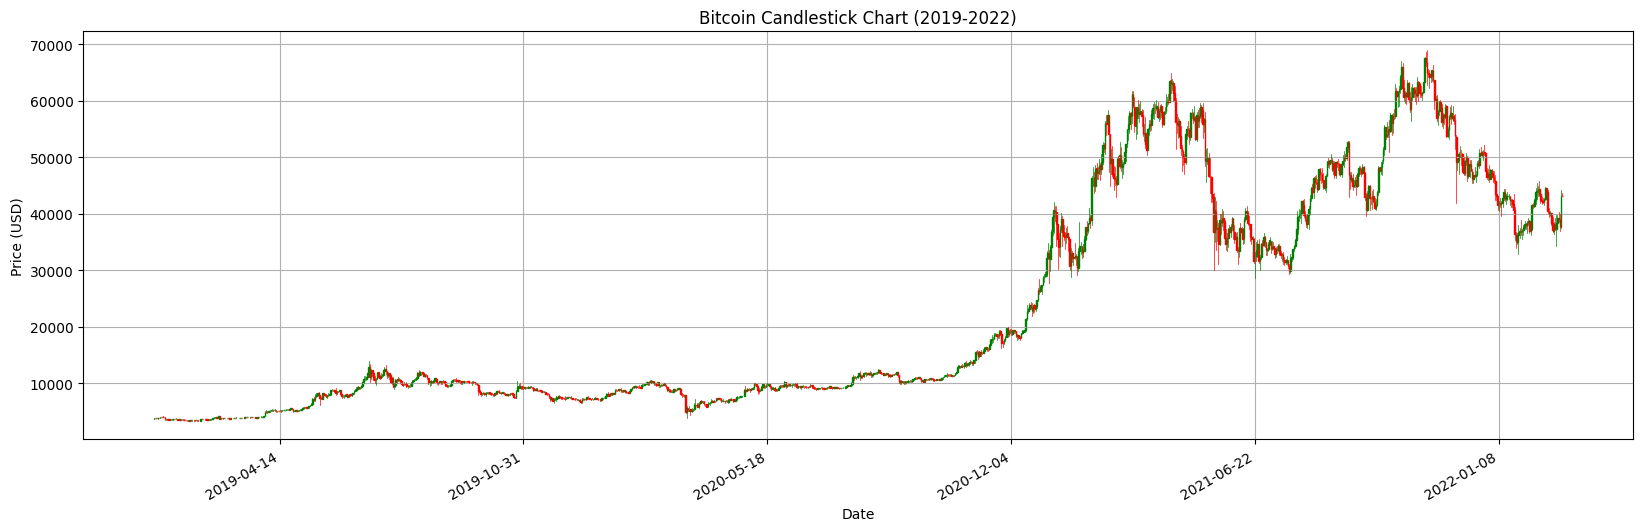

In [27]:
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import datetime

# Filter data for 2019-2022
df_filtered = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2022-12-31')]

# Convert date to matplotlib format
df_filtered['date'] = df_filtered['date'].map(mdates.date2num)

# Create the candlestick chart
fig, ax = plt.subplots(figsize=(20, 6))

candlestick_ohlc(ax, df_filtered[['date', 'open', 'high', 'low', 'close']].values, width=0.6, colorup='g', colordown='r')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

plt.title('Bitcoin Candlestick Chart (2019-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)

# Save the plot as a PDF
plt.savefig('bitcoin_candlestick_2019_2022.pdf')

plt.show()

In [28]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

df["Standardized_Close_Prices"] = scalar.fit_transform(df["close"].values.reshape(-1,1))
df["Standardized_Open_Prices"] = scalar.fit_transform(df["open"].values.reshape(-1,1))
df["Standardized_High_Prices"] = scalar.fit_transform(df["high"].values.reshape(-1,1))
df["Standardized_Low_Prices"] = scalar.fit_transform(df["low"].values.reshape(-1,1))

In [29]:
#Converting Date to numerical form

df['date_str'] = df['date'].dt.strftime('%Y%m%d%H%M%S')

# Convert the string date to a numerical value
df['NumericalDate'] = pd.to_numeric(df['date_str'])

# Drop the intermediate 'date_str' column if not needed
df.drop(columns=['date_str'], inplace=True)

In [30]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,year,month,day,Standardized_Close_Prices,Standardized_Open_Prices,Standardized_High_Prices,Standardized_Low_Prices,NumericalDate
0,1646092800,2022-03-01,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,2022,3,1,1.933444,1.937893,1.887415,2.029161,20220301000000
1,1646006400,2022-02-28,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,2022,2,28,1.933045,1.599553,1.925034,1.665409,20220228000000
2,1645920000,2022-02-27,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,2022,2,27,1.597274,1.687421,1.663971,1.636567,20220227000000
3,1645833600,2022-02-26,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,2022,2,26,1.685357,1.693320,1.690505,1.737377,20220226000000
4,1645747200,2022-02-25,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,2022,2,25,1.690577,1.639126,1.654474,1.700955,20220225000000


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

b = 0
w = np.zeros(X_train.shape[1])
lr = 0.01
epochs = 200

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
def perdict(X,w,b):
    return X.dot(w) + b

def gradient(y_hat, y, x):
    loss = y_hat-y
    dw = x.T.dot(loss)/len(y)
    db = np.sum(loss)/len(y)
    
    cost = np.sum(loss**2)/(2*len(y))
    
    return (dw,db, cost)

def update_weight(w,b,lr,dw,db):
    w_new = w - lr*dw
    b_new = b - lr*db
    return (w_new, b_new)

def linear_regression_vectorized(X, y, learning_rate=0.01, epoch=200):
    n_sample,n_feature = X.shape
    w = np.zeros(n_feature)
    b = 0
    losses = []
    
    for i in range(epoch):
        y_hat = perdict(X,w,b)
        dw,db,cost = gradient(y_hat,y,X)
        
        w , b = update_weight(w,b,learning_rate,dw,db)
        
        losses.append(cost)
        
    return w , b, losses

In [36]:
X = df[["Standardized_Open_Prices", "Standardized_High_Prices", "Standardized_Low_Prices"]]
y = df["Standardized_Close_Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

b = 0
w = np.zeros(X_train.shape[1])
lr = 0.01
epochs = 200

w, b, losses = linear_regression_vectorized(X_train.values, y_train.values, lr, epochs)

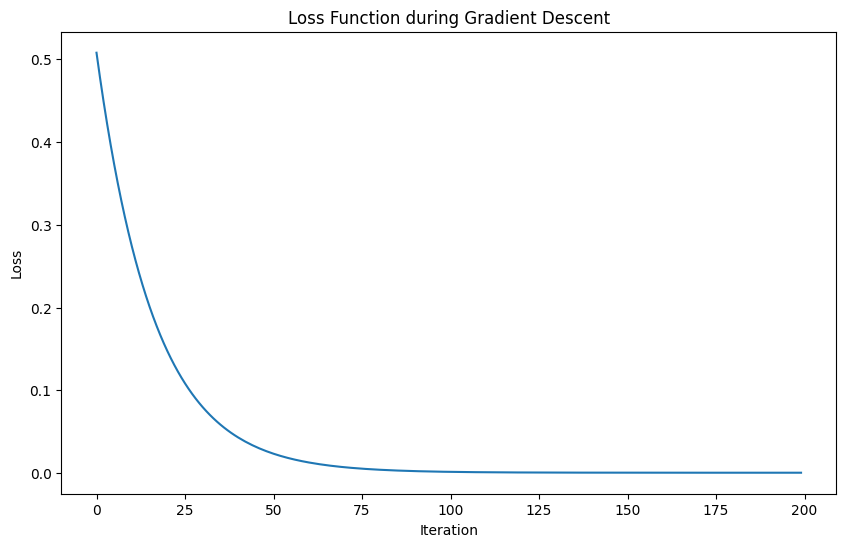

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function during Gradient Descent')
plt.show()

In [47]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = perdict(X_test, w, b)

# Calculate RMSE
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

# Calculate MAE
mae = np.mean(np.abs(y_pred - y_test))

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


# Calculate R-squared on training data
y_train_pred = perdict(X_train, w, b)
train_accuracy = r2_score(y_train, y_train_pred)

# Calculate R-squared on testing data
test_accuracy = r2_score(y_test, y_pred)

print("Root Mean Square Error (RMSE):", round(rmse, 4))
print("Mean Absolute Error (MAE):", round(mae, 4))
print("Training Accuracy (R-squared):", round(train_accuracy, 4))
print("Testing Accuracy (R-squared):", round(test_accuracy, 4))

Root Mean Square Error (RMSE): 0.982
Mean Absolute Error (MAE): 0.7057
Training Accuracy (R-squared): -0.0
Testing Accuracy (R-squared): -0.0


C:\Users\admin\AppData\Local\Temp\ipykernel_7560\3843425141.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015['predicted_close'] = df_2015['close'].shift(1)


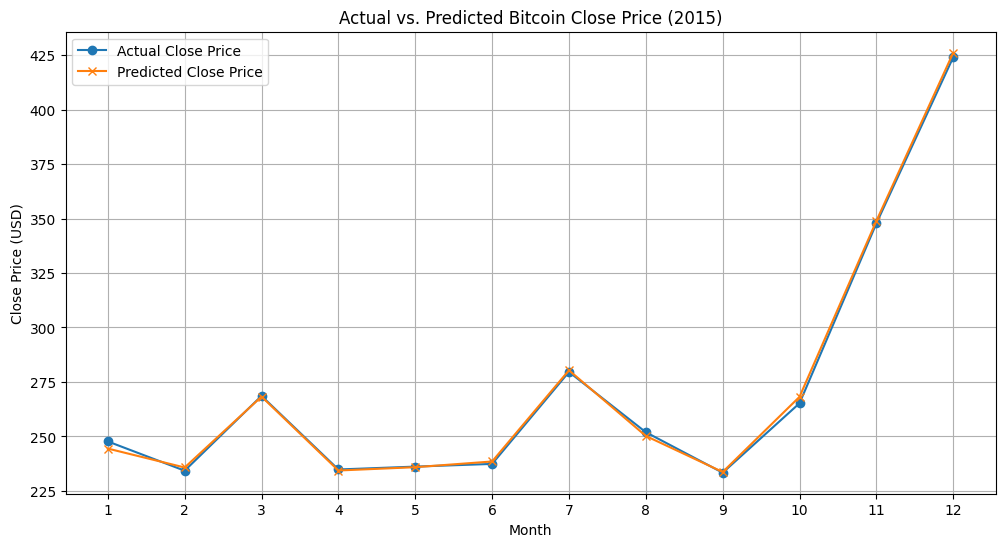

In [38]:
df_2015 = df[df['date'].dt.year == 2015]

monthly_actual = df_2015.groupby(df_2015['date'].dt.month)['close'].mean()

df_2015['predicted_close'] = df_2015['close'].shift(1)
monthly_predicted = df_2015.groupby(df_2015['date'].dt.month)['predicted_close'].mean()


# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_actual.index, monthly_actual.values, label='Actual Close Price', marker='o')
plt.plot(monthly_predicted.index, monthly_predicted.values, label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (2015)')
plt.xlabel('Month')
plt.ylabel('Close Price (USD)')
plt.xticks(monthly_actual.index)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_7560\655946329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)


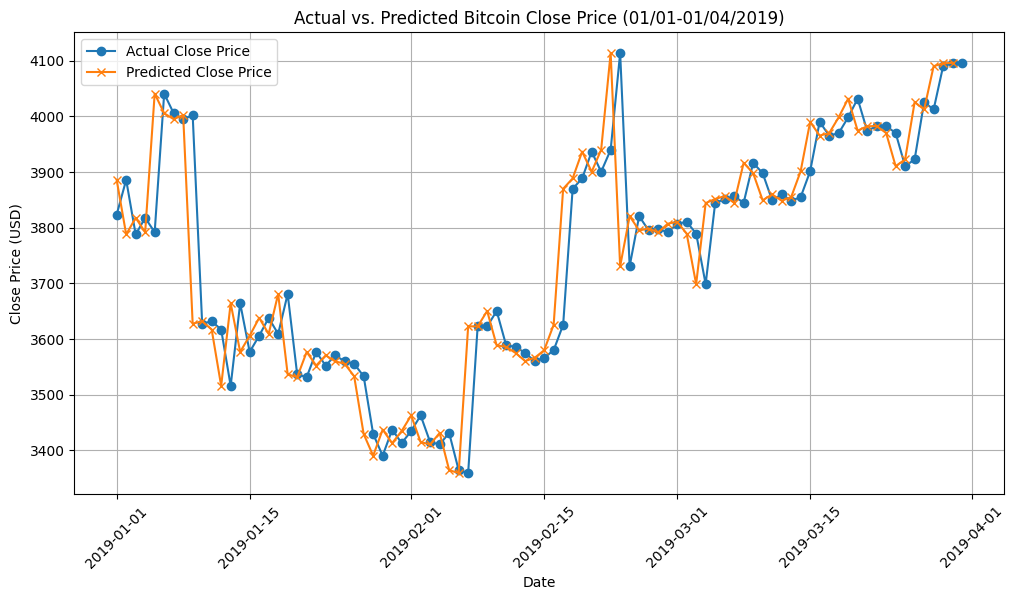

In [45]:
# Filter data for 2019-01-01 to 2019-03-31
df_2019_Q1 = df[(df['date'] >= '2019-01-01') & (df['date'] <= '2019-03-31')]

# Assuming you have a way to predict the close prices for 2019-01-01 to 2019-03-31 (replace with your prediction method)
# For this example, I'll just use the previous day's close price as a simple prediction.
df_2019_Q1['predicted_close'] = df_2019_Q1['close'].shift(1)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(df_2019_Q1['date'], df_2019_Q1['close'], label='Actual Close Price', marker='o')
plt.plot(df_2019_Q1['date'], df_2019_Q1['predicted_close'], label='Predicted Close Price', marker='x')
plt.title('Actual vs. Predicted Bitcoin Close Price (01/01-01/04/2019)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()